In [30]:
import pandas as pd
import matplotlib.pyplot as plt

spend = pd.read_csv('spend.csv', encoding='cp949')

spend.head()

,시도별,시점,03 의류 및 신발,이미용 및 미용시설,개인용 전기용품 및 미용용품,기초화장품,기능성화장품,색조화장품,12.3 기타 개인용품
0,전국,2012,87.862,82.509,96.864,93.035,80.101,89.476,76.972
1,전국,2013,90.431,85.402,98.563,94.115,91.991,89.479,81.195
2,전국,2014,94.060,88.635,101.898,97.776,101.943,91.958,85.609
3,전국,2015,95.317,90.624,103.651,99.302,102.585,94.838,92.175
4,전국,2016,97.029,91.759,102.885,99.101,101.243,95.072,94.302


In [31]:
spend = spend.drop(columns='시도별')

spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   시점               11 non-null     int64  
 1   03 의류 및 신발       11 non-null     float64
 2   이미용 및 미용시설       11 non-null     float64
 3   개인용 전기용품 및 미용용품  11 non-null     float64
 4   기초화장품            11 non-null     float64
 5   기능성화장품           11 non-null     float64
 6   색조화장품            11 non-null     float64
 7   12.3 기타 개인용품     11 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 832.0 bytes


In [32]:
spend['화장품'] = round((spend['기초화장품'] + spend['기능성화장품'] + spend['색조화장품'])/3,2)

spend = spend.drop(columns=['기초화장품', '기능성화장품', '색조화장품','개인용 전기용품 및 미용용품'])

spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   시점            11 non-null     int64  
 1   03 의류 및 신발    11 non-null     float64
 2   이미용 및 미용시설    11 non-null     float64
 3   12.3 기타 개인용품  11 non-null     float64
 4   화장품           11 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 568.0 bytes


In [33]:
spend.columns

Index(['시점', '03 의류 및 신발', '이미용 및 미용시설', '12.3 기타 개인용품', '화장품'], dtype='object')

In [34]:
spend.columns = ['시점' ,'의류', '미용료', '패션잡화','화장품']

spend.head()

,시점,의류,미용료,패션잡화,화장품
0,2012,87.862,82.509,76.972,87.54
1,2013,90.431,85.402,81.195,91.86
2,2014,94.060,88.635,85.609,97.23
3,2015,95.317,90.624,92.175,98.91
4,2016,97.029,91.759,94.302,98.47


In [39]:
spend.index = spend['시점']

spend = spend.drop(columns='시점')

spend

,의류,미용료,패션잡화,화장품
시점,,,,
2012,87.862,82.509,76.972,87.54
2013,90.431,85.402,81.195,91.86
2014,94.060,88.635,85.609,97.23
2015,95.317,90.624,92.175,98.91
2016,97.029,91.759,94.302,98.47
2017,98.082,93.359,96.298,99.27
2018,99.169,96.400,97.431,98.42
2019,99.270,98.585,99.505,99.07
2020,100.000,100.000,100.000,100.00


In [54]:
# matplotlib 한글깨짐 현상 해결
plt.rcParams['font.family'] ='Malgun Gothic'

plt.rcParams['axes.unicode_minus'] =False

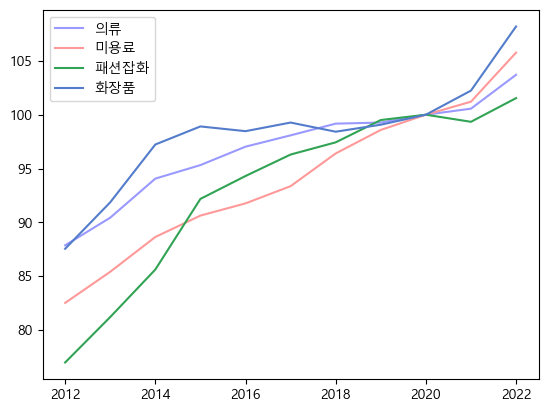

In [64]:
colors = ['#9999ff', '#ff9999', '#31a354', '#537ccb']
for i in range(4):
    col_name = spend.columns[i]
    plt.plot(spend[col_name], label=col_name , color=colors[i])
plt.legend()

plt.show()